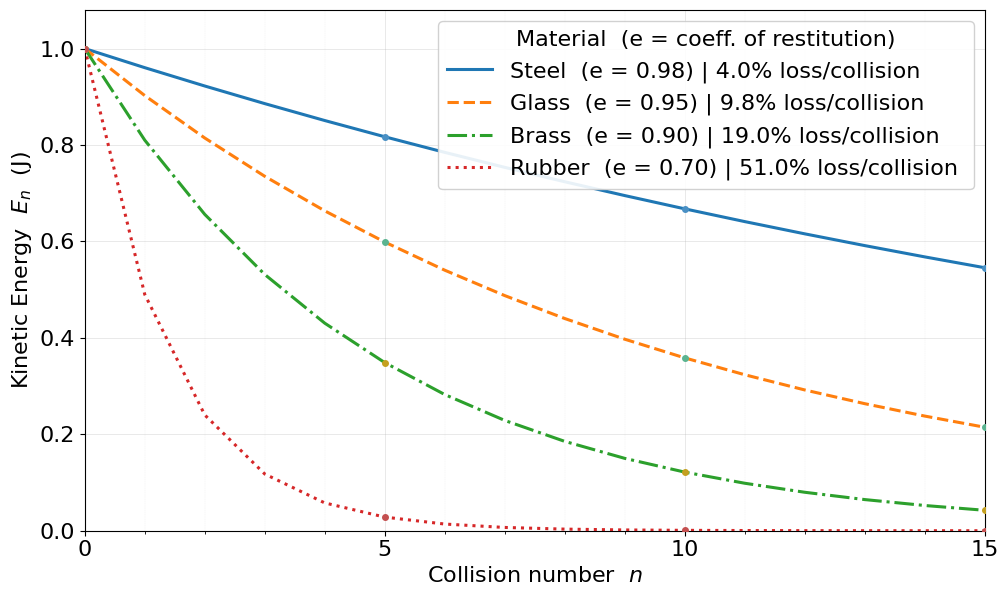

Saved: energy_decay.png

Material        e   Loss/collision   Half-life (n)
----------------------------------------------------
Steel        0.98           3.96%            18
Glass        0.95           9.75%             7
Brass        0.90          19.00%             4
Rubber       0.70          51.00%             1


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# ── Parameters ────────────────────────────────────────────────────────────────
E0   = 1.0          # Initial kinetic energy (J)
Nmax = 40           # Number of collisions to simulate

materials = [
    {"name": "Steel",  "e": 0.98, "color": "#4a90c4", "ls": "-"},
    {"name": "Glass",  "e": 0.95, "color": "#5ab490", "ls": "--"},
    {"name": "Brass",  "e": 0.90, "color": "#c4a020", "ls": "-."},
    {"name": "Rubber", "e": 0.70, "color": "#c45050", "ls": ":"},
]

# ── Energy decay: E_n = e^(2n) * E0  (from eq. 41 applied repeatedly) ────────
n = np.arange(0, Nmax + 1)

def energy(e, n):
    return E0 * e**(2 * n)

# ── Plot setup ────────────────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(10, 6))


# ── Plot each material ────────────────────────────────────────────────────────
for mat in materials:
    E = energy(mat["e"], n)
    loss_pct = (1 - mat["e"]**2) * 100          # % lost per collision
    half_life = int(np.ceil(                      # collision where E = E0/2
        np.log(0.5) / (2 * np.log(mat["e"]))))

    label = (f"{mat['name']}  (e = {mat['e']:.2f}) | "
             f"{loss_pct:.1f}% loss/collision ")

    ax.plot(n, E,
            linewidth=2.2,
            linestyle=mat["ls"],
            label=label)

    # Dot markers every 5 collisions
    ax.plot(n[::5], energy(mat["e"], n[::5]),
            "o", color=mat["color"], markersize=4, zorder=5)


# ── Axes and labels ───────────────────────────────────────────────────────────
ax.set_xlabel("Collision number  $n$", fontsize=16)
ax.set_ylabel("Kinetic Energy  $E_n$  (J)", fontsize=16)
ax.set_xlim(0, 15)
ax.set_ylim(0, E0 * 1.08)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))

ax.grid(True, which="major", linestyle="-",  linewidth=0.5, alpha=0.4)
ax.grid(True, which="minor", linestyle="--", linewidth=0.3, alpha=0.2)


# ── Legend ────────────────────────────────────────────────────────────────────
leg = ax.legend(fontsize=16, loc="upper right",
                framealpha=0.9,
                title="Material  (e = coeff. of restitution)",
                title_fontsize=16)

plt.tight_layout()
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.savefig("energy_decay.pdf", dpi=150, bbox_inches="tight")
plt.show()

print("Saved: energy_decay.png")

# ── Console summary table ─────────────────────────────────────────────────────
print(f"\n{'Material':<10} {'e':>6} {'Loss/collision':>16} {'Half-life (n)':>15}")
print("-" * 52)
for mat in materials:
    loss = (1 - mat["e"]**2) * 100
    hl   = int(np.ceil(np.log(0.5) / (2 * np.log(mat["e"]))))
    print(f"{mat['name']:<10} {mat['e']:>6.2f} {loss:>14.2f}%  {hl:>12}")


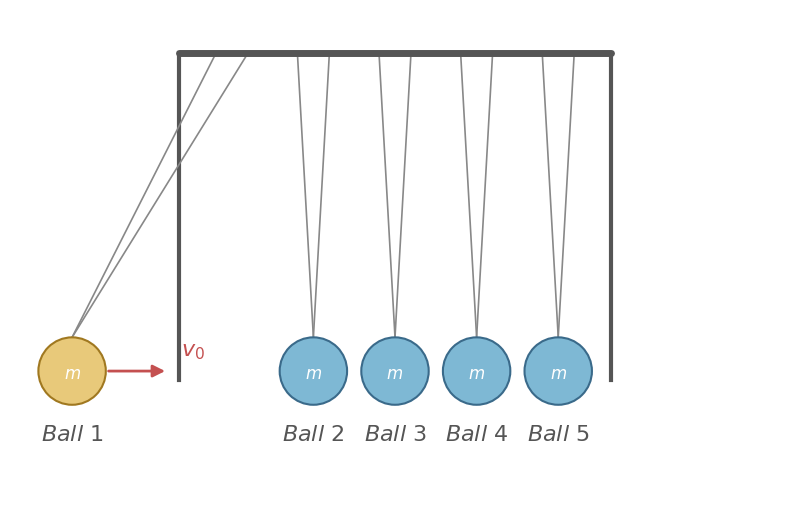

Saved: cradle_schematic.png


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyArrowPatch

# ── Figure setup ──────────────────────────────────────────────────────────────
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
axes = [ax]

configs = [
    {
        "offsets":   [-1.8, 0, 0, 0, 0],
        "velocities": [1,   0, 0, 0, 0],
        "highlight":  [0],
    },
]

BALL_R   = 0.38          # ball radius
SPACING  = 0.92          # centre-to-centre spacing at rest
N        = 5             # number of balls
STR_LEN  = 2.8           # string length
FRAME_Y  = STR_LEN + BALL_R + 0.4   # y position of top frame bar
C_BALL   = "#7eb8d4"
C_ACTIVE = "#e8c97a"
C_FRAME  = "#555555"
C_STRING = "#888888"
C_BG     = "#f9f9f7"

# Rest x positions (centred at 0)
rest_x = np.array([(i - (N-1)/2) * SPACING for i in range(N)])

for ax, cfg, in zip(axes, configs):
    ax.set_facecolor(C_BG)
    ax.set_aspect("equal")
    ax.axis("off")

    # ── Top frame bar ─────────────────────────────────────────────────────────
    frame_x0 = rest_x[0]  - 0.6
    frame_x1 = rest_x[-1] + 0.6
    ax.plot([frame_x0, frame_x1], [FRAME_Y, FRAME_Y],
            color=C_FRAME, linewidth=5, solid_capstyle="round", zorder=3)

    # Vertical frame supports
    for fx in [frame_x0, frame_x1]:
        ax.plot([fx, fx], [FRAME_Y, -0.1],
                color=C_FRAME, linewidth=3, zorder=2)

    # ── Balls and strings ─────────────────────────────────────────────────────
    for i in range(N):
        offset = cfg["offsets"][i]
        bx = rest_x[i] + offset
        by = 0.0

        # String attachment point on frame (always at rest_x)
        attach_x = rest_x[i]

        # Compute string end at top of ball
        dx = bx - attach_x
        dy = by + BALL_R - FRAME_Y
        length = np.sqrt(dx**2 + dy**2)

        # Draw two strings per ball (left and right attachment)
        for sx in [attach_x - 0.18, attach_x + 0.18]:
            ax.plot([sx, bx], [FRAME_Y, by + BALL_R],
                    color=C_STRING, linewidth=1.2, zorder=2)

        # Ball
        is_active = i in cfg["highlight"]
        color = C_ACTIVE if is_active else C_BALL
        circle = plt.Circle((bx, by), BALL_R,
                             color=color, zorder=4,
                             ec="#3a6a8a" if not is_active else "#a07820",
                             linewidth=1.5)
        ax.add_patch(circle)



        # Ball label: mass m
        ax.text(bx, by - 0.02, "$m$",
                ha="center", va="center",
                fontsize=12, color="white", fontweight="bold", zorder=6)

        # Ball number subscript below ball
        ax.text(bx, by - BALL_R - 0.22, f"$Ball\\ {i+1}$",
                ha="center", va="top", fontsize=16,
                color="#555555", zorder=5)

    # ── Velocity arrows ───────────────────────────────────────────────────────
    for i in range(N):
        v = cfg["velocities"][i]
        if v == 0:
            continue
        offset = cfg["offsets"][i]
        bx = rest_x[i] + offset
        by = 0.0
        arrow_dx = v * 0.7
        ax.annotate("",
                    xy=(bx + arrow_dx + v*BALL_R, by),
                    xytext=(bx + v*BALL_R, by),
                    arrowprops=dict(arrowstyle="-|>",
                                   color="#c45050",
                                   lw=2.0,
                                   mutation_scale=18),
                    zorder=7)
        # v0 label
        label = "$v_0$" if cfg["velocities"][i] == 1 and i == 0 or i == 4 else ""
        ax.text(bx + v*(BALL_R + 0.85), by + 0.18,
                "$v_0$", ha="left", fontsize=16,
                color="#c45050", zorder=7)








    ax.set_xlim(rest_x[0] - 2.5, rest_x[-1] + 2.5)
    ax.set_ylim(-1.6, FRAME_Y + 0.5)

# ── Overall title ─────────────────────────────────────────────────────────────


plt.tight_layout(rect=[0, 0.08, 1, 1])
plt.savefig("cradle_schematic.pdf", dpi=150, bbox_inches="tight")
plt.show()
print("Saved: cradle_schematic.png")


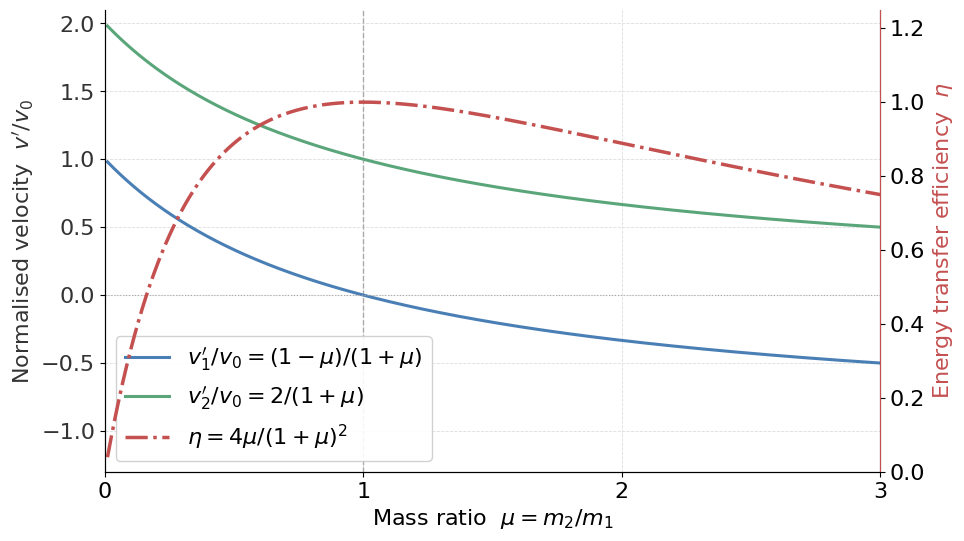

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# ── Parameters ────────────────────────────────────────────────────────────────
mu = np.linspace(0.01, 10, 2000)   # mass ratio mu = m2/m1

# ── Equations (6), (7), (8) ───────────────────────────────────────────────────
v1_norm =  (1 - mu) / (1 + mu)          # v1' / v0
v2_norm =   2       / (1 + mu)          # v2' / v0
eta     = 4 * mu   / (1 + mu)**2        # energy transfer efficiency

# ── Figure setup — single plot, dual y-axes ───────────────────────────────────


fig, ax1 = plt.subplots(figsize=(10, 6))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
ax2 = ax1.twinx()

C_BG    = "#f9f9f7"
C_V1    = "#4a7fb5"
C_V2    = "#5aa67a"
C_ETA   = "#c45050"
C_GRID  = "#dddddd"
C_ANNOT = "#555555"


ax1.spines["top"].set_visible(False)
ax1.yaxis.grid(True, linestyle="--", linewidth=0.6, color=C_GRID, zorder=0)
ax1.xaxis.grid(True, linestyle="--", linewidth=0.6, color=C_GRID, zorder=0)
ax1.set_axisbelow(True)
ax2.spines["top"].set_visible(False)


# ── Velocity curves on left axis ──────────────────────────────────────────────
l1, = ax1.plot(mu, v1_norm, color=C_V1, linewidth=2.2,
               label=r"$v_1' / v_0 = (1-\mu)/(1+\mu)$")
l2, = ax1.plot(mu, v2_norm, color=C_V2, linewidth=2.2,
               label=r"$v_2' / v_0 = 2/(1+\mu)$")

ax1.axhline(0, color="#aaaaaa", linewidth=0.8, linestyle=":")
ax1.axvline(1, color="#aaaaaa", linewidth=1.0, linestyle="--", zorder=1)

# mu=1 markers and annotations


ax1.set_ylabel(r"Normalised velocity  $v'/v_0$", fontsize=16, color="#333333")
ax1.set_ylim(-1.3, 2.1)
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax1.tick_params(axis="y", labelcolor="#333333")
# ── Efficiency curve on right axis ────────────────────────────────────────────
l3, = ax2.plot(mu, eta, color=C_ETA, linewidth=2.5, linestyle="-.",
               label=r"$\eta = 4\mu/(1+\mu)^2$")





ax2.set_ylabel(r"Energy transfer efficiency  $\eta$", fontsize=16, color=C_ETA)
ax2.set_ylim(0, 1.25)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax2.tick_params(axis="y")
ax2.spines["right"].set_edgecolor(C_ETA)
# ── Axes, title, legend ───────────────────────────────────────────────────────
ax1.set_xlabel(r"Mass ratio  $\mu = m_2 / m_1$", fontsize=16)
ax1.set_xlim(0, 3)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))


lines = [l1, l2, l3]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize=16, loc="lower left",
           framealpha=0.9)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.savefig("mass_ratio_figure.pdf")
plt.show()

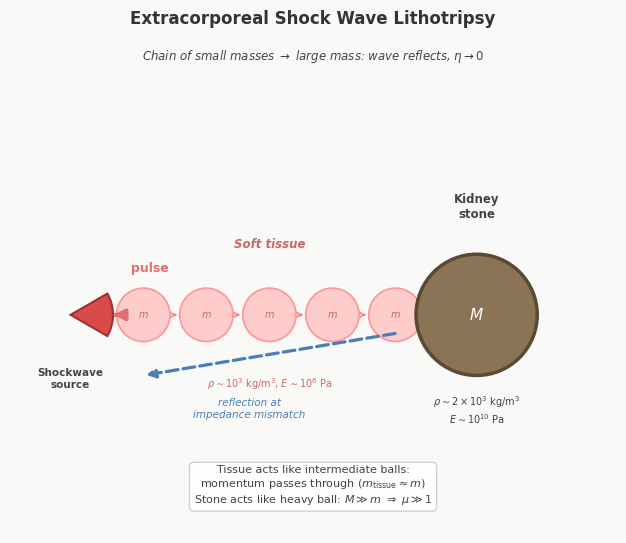

Saved: lithotripsy_analogy.pdf


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyArrowPatch, Circle, Wedge

# ── Figure setup ──────────────────────────────────────────────────────────────
fig, ax2 = plt.subplots(1, 1, figsize=(9, 5.5))
fig.patch.set_facecolor("#f9f9f7")

C_BG      = "#f9f9f7"
C_BALL    = "#7eb8d4"
C_ACTIVE  = "#e8c97a"
C_TISSUE  = "#ffcccc"
C_STONE   = "#8b7355"
C_WAVE    = "#e07070"
C_ANNOT   = "#444444"

ax2.set_facecolor(C_BG)
ax2.set_aspect("equal")
ax2.axis("off")

# ══════════════════════════════════════════════════════════════════════════════
# LITHOTRIPSY AS BALL CHAIN
# ══════════════════════════════════════════════════════════════════════════════
ax2.set_xlim(-2.5, 2.5)
ax2.set_ylim(-1.0, 3.0)

# Shockwave source (transducer)
transducer_x = -2.0
transducer_y = 0.8
transducer = Wedge((transducer_x, transducer_y), 0.35, -30, 30,
                   color="#d94a4a", ec="#a03030", linewidth=1.5, zorder=3)
ax2.add_patch(transducer)
ax2.text(transducer_x, transducer_y - 0.6, "Shockwave\nsource",
         ha="center", fontsize=7.5, color=C_ANNOT, fontweight="bold")

# Tissue as chain of small balls (representing soft, compliant medium)
tissue_ball_r = 0.22
tissue_spacing = 0.52
n_tissue = 5
tissue_x = [transducer_x + 0.6 + i * tissue_spacing for i in range(n_tissue)]

for i, tx in enumerate(tissue_x):
    # Small tissue ball
    circle = Circle((tx, transducer_y), tissue_ball_r,
                   color=C_TISSUE, ec="#ff9999", linewidth=1.3, zorder=4)
    ax2.add_patch(circle)

    # Mass label
    ax2.text(tx, transducer_y, "$m$", ha="center", va="center",
             fontsize=7, color="#cc6666", fontweight="bold", zorder=5)

# Tissue region label
ax2.text(tissue_x[2], transducer_y + 0.55, "Soft tissue",
         ha="center", fontsize=8.5, color="#cc6666", style="italic",
         fontweight="bold")
ax2.text(tissue_x[2], transducer_y - 0.6,
         r"$\rho \sim 10^3$ kg/m$^3$, $E \sim 10^6$ Pa",
         ha="center", fontsize=7, color="#cc6666")

# Kidney stone (large heavy ball at end)
stone_x = tissue_x[-1] + tissue_spacing + 0.15
stone_y = transducer_y
stone_r = 0.5
stone = Circle((stone_x, stone_y), stone_r, color=C_STONE,
               ec="#5a4a35", linewidth=2.5, zorder=4)
ax2.add_patch(stone)
ax2.text(stone_x, stone_y, "$M$", ha="center", va="center",
         fontsize=11, color="white", fontweight="bold", zorder=5)

# Stone label
ax2.text(stone_x, stone_y + 0.8, "Kidney\nstone",
         ha="center", fontsize=8.5, color=C_ANNOT, fontweight="bold")
ax2.text(stone_x, stone_y - stone_r - 0.4,
         r"$\rho \sim 2 \times 10^3$ kg/m$^3$" "\n" r"$E \sim 10^{10}$ Pa",
         ha="center", fontsize=7, color=C_ANNOT)

# Incoming pulse arrow
ax2.annotate("", xy=(tissue_x[0] - tissue_ball_r - 0.05, transducer_y),
             xytext=(transducer_x + 0.4, transducer_y),
             arrowprops=dict(arrowstyle="-|>", color=C_WAVE, lw=2.8,
                             mutation_scale=16), zorder=6)
ax2.text(transducer_x + 0.5, transducer_y + 0.35, "pulse",
         fontsize=9, color=C_WAVE, fontweight="bold")

# Energy transfer through tissue (curved arrows between balls)
for i in range(len(tissue_x) - 1):
    mid_x = (tissue_x[i] + tissue_x[i+1]) / 2
    ax2.annotate("",
                xy=(tissue_x[i+1] - tissue_ball_r - 0.02, transducer_y),
                xytext=(tissue_x[i] + tissue_ball_r + 0.02, transducer_y),
                arrowprops=dict(arrowstyle="->", color="#ff6666",
                               lw=1.5, alpha=0.7), zorder=3)

# Energy to stone
ax2.annotate("",
            xy=(stone_x - stone_r - 0.02, stone_y),
            xytext=(tissue_x[-1] + tissue_ball_r + 0.02, transducer_y),
            arrowprops=dict(arrowstyle="->", color="#ff6666",
                           lw=1.5, alpha=0.7), zorder=3)

# Reflected wave (dashed arrow back)
ax2.annotate("", xy=(transducer_x + 0.6, transducer_y - 0.5),
             xytext=(stone_x - stone_r - 0.15, stone_y - 0.15),
             arrowprops=dict(arrowstyle="-|>", color="#4a7fb5", lw=2.3,
                             mutation_scale=13, linestyle="--"), zorder=6)
ax2.text((transducer_x + stone_x) / 2 - 0.2, transducer_y - 0.85,
         "reflection at\nimpedance mismatch", fontsize=7.5, ha="center",
         color="#4a7fb5", style="italic")

# Analogy annotation
ax2.text(0, -0.75,
         "Tissue acts like intermediate balls:\n"
         r"momentum passes through ($m_{\text{tissue}} \approx m$)"
         "\n"
         r"Stone acts like heavy ball: $M \gg m$ $\Rightarrow$ $\mu \gg 1$",
         ha="center", fontsize=8, color=C_ANNOT,
         bbox=dict(boxstyle="round,pad=0.4", facecolor="white",
                   edgecolor="#cccccc", alpha=0.9))

# Title
ax2.text(0, 3.2, "Extracorporeal Shock Wave Lithotripsy", ha="center",
         fontsize=12, fontweight="bold", color="#333333")
ax2.text(0, 2.9, r"Chain of small masses $\rightarrow$ large mass: wave reflects, $\eta \to 0$",
         ha="center", fontsize=8.5, color=C_ANNOT, style="italic")

plt.tight_layout()
plt.savefig("lithotripsy_analogy.pdf", format="pdf", bbox_inches="tight", dpi=150)
plt.show()
print("Saved: lithotripsy_analogy.pdf")